In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [ ]:
#load the dataset into a pandas DataFrame
df  = pd.read_csv("UniversalBank.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#drop the unnecessary attributes
df.drop(columns=['ID', 'ZIP Code'], inplace=True)

In [ ]:
#get the size of the dataset
df.shape

(5000, 12)

In [ ]:
#separate the dataset into target variable and features
y = df['Personal Loan']
X = df.drop(columns=['Personal Loan'])

In [ ]:
#splitting the dataset into train and test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#standardize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr = LogisticRegression().fit(X_train, y_train)
lr_probabilities = lr.predict_proba(X_test)[:, 1]

knn = KNeighborsClassifier().fit(X_train, y_train)
knn_probabilities = knn.predict_proba(X_test)[:, 1]

dt = DecisionTreeClassifier().fit(X_train, y_train)
dt_probabilities = dt.predict_proba(X_test)[:, 1]

rf = RandomForestClassifier().fit(X_train, y_train)
rf_probabilities = rf.predict_proba(X_test)[:, 1]

svc = SVC(probability=True).fit(X_train, y_train)
svc_probabilities = svc.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

#Precision-Recall Curve and AUC score for Logistic Regression
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, lr_probabilities)
lr_auc = auc(lr_recall, lr_precision)

#Precision-Recall Curve and AUC score for K-Nearest Neighbors
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(y_test, knn_probabilities)
knn_auc = auc(knn_recall, knn_precision)

#Precision-Recall Curve and AUC score for the Decision Tree Classifier
dt_precision, dt_recall, dt_thresholds = precision_recall_curve(y_test, dt_probabilities)
dt_auc = auc(dt_recall, dt_precision)

#Precision-Recall Curve and AUC score for the Random Forest Classifier
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_test, rf_probabilities)
rf_auc = auc(rf_recall, rf_precision)

#Precision-Recall Curve and AUC score for The SVM Classifier
svc_precision, svc_recall, svc_thresholds = precision_recall_curve(y_test, svc_probabilities)
svc_auc = auc(svc_recall, svc_precision)

#baseline model
baseline_model = sum(y_test == 1) / len(y_test)

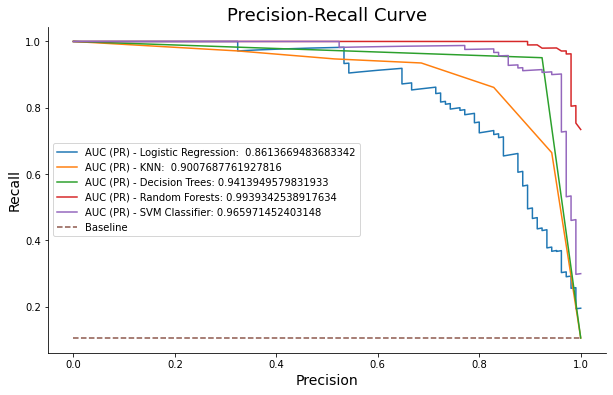

In [ ]:
#plots the Precision-Recall curves
plt.figure(figsize=(10, 6))

plt.plot(lr_recall, lr_precision, label=f"AUC (PR) - Logistic Regression:  {lr_auc}")
plt.plot(knn_recall, knn_precision, label=f"AUC (PR) - KNN:  {knn_auc}")
plt.plot(dt_recall, dt_precision, label=f"AUC (PR) - Decision Trees: {dt_auc}")
plt.plot(rf_recall, rf_precision, label=f"AUC (PR) - Random Forests: {rf_auc}")
plt.plot(svc_recall, svc_precision, label=f"AUC (PR) - SVM Classifier: {svc_auc}")

plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline')

plt.xlabel('Precision', size=14)
plt.ylabel('Recall', size=14)
plt.title('Precision-Recall Curve', size=18)
plt.legend()

plt.show()